In [1]:
import numpy as np
import matplotlib.pyplot as plt

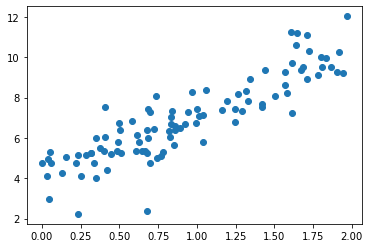

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.scatter(X,y)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

array([[3.92613257],
       [3.22147346]])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.92613257]), array([[3.22147346]]))

In [6]:
X_new = np.array([[1], [2]])
lin_reg.predict(X_new)

array([[ 7.14760603],
       [10.3690795 ]])

SGD Regression

In [7]:
from sklearn.linear_model import  SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None,
                      eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.87267149]), array([3.20069748]))

Polynomial Regression

In [8]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

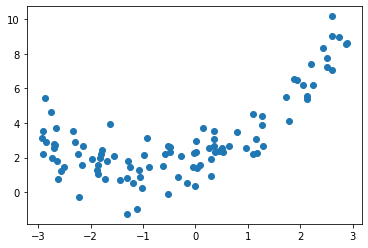

In [9]:
plt.scatter(X,y)

Adding Polynomial Features

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree =2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[-1.43109197]


array([-1.43109197,  2.04802422])

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.7935602]), array([[1.04582509, 0.5195734 ]]))

Learning Curves

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    

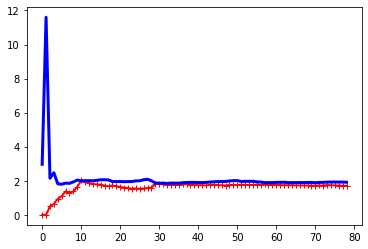

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

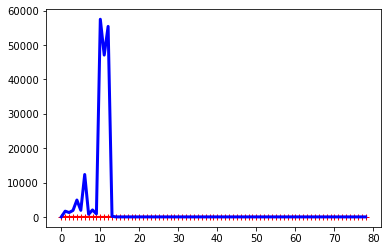

In [14]:
#learning curves for polynomial Regression
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X,y)

In [15]:
#with closed form equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)

ridge_reg.predict([[1.5]])

array([[4.67551297]])

In [16]:
#with stochastic gradiant dissent
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([4.64789768])

Lasso Regression

l1 norm

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.61847133])

In [18]:
#with stochastic gradiant dissent
sgd_lreg = SGDRegressor(penalty = 'l1')
sgd_lreg.fit(X, y.ravel())

sgd_lreg.predict([[1.5]])

array([4.63399904])

Elastic Net

the mix of Lasso and Ridge
r = 0 Ridge
r = 1 Lasso

In [19]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio= 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.62293723])

Early Stopping

In [21]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias= False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

In [24]:
sgd_reg = SGDRegressor(max_iter =1, tol =-np.infty, warm_start = True,
                      penalty = None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = clone(sgd_reg)

Logistic Regression

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [35]:
X = iris["data"][:,3:] #petel width
y = (iris["target"] == 2).astype(np.int)

C:\Users\pk\AppData\Local\Temp/ipykernel_11476/2055128989.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

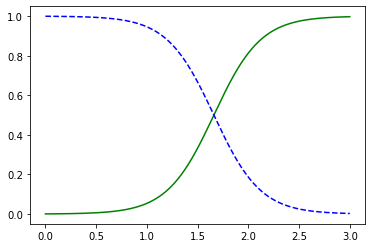

In [41]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

Multinomial Logistic Regression

In [42]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",
                                solver = "lbfgs",
                                C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [43]:
softmax_reg.predict([[5,2]])

array([2])

In [44]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])